In [2]:
import networkx as nx

G = nx.karate_club_graph()

In [23]:
import torch

def graph_to_edge_list(G: nx.Graph):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected
  # by two nodes.

  edge_list = []

  for edge in G.edges:
    u, v = edge
    edge_list.append([u, v])

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2, len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############

  edge_index = torch.LongTensor(edge_list).t()

  #########################################

  return edge_index

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [27]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation
  # works on the karate club network. In this implementation, self loops should
  # not be considered as either a positive or negative edge. Also, notice that
  # the karate club network is an undirected graph, if (0, 1) is a positive
  # edge, do you think (1, 0) can be a negative one?

  neg_edge_list = []

  ############# Your code here ############

  nodes = list(G.nodes())

  while len(neg_edge_list) < num_neg_samples:
    u, v = random.sample(nodes, 2)
    if not G.has_edge(u, v) and not G.has_edge(v, u) and v != u:
      neg_edge_list.append([u, v])

  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))

# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge
for edge in [edge_1, edge_2, edge_3, edge_4, edge_5]:
    u, v = edge
    can_be_negative = not G.has_edge(u, v) and u != v and not G.has_edge(v, u)
    print(f"Edge {edge} can be a negative edge: {can_be_negative}")

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
Edge (7, 1) can be a negative edge: False
Edge (1, 33) can be a negative edge: True
Edge (33, 22) can be a negative edge: False
Edge (0, 4) can be a negative edge: False
Edge (4, 2) can be a negative edge: True


In [9]:
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

2.3.1+cu121


In [32]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change
  # the values of num_node and embedding_dim. The weight matrix of returned
  # layer should be initialized under uniform distribution.

  emb = None

  ############# Your code here ############

  emb = nn.Embedding(num_node, embedding_dim)
  emb.weight.data = torch.rand(num_node, embedding_dim)

  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward0>)


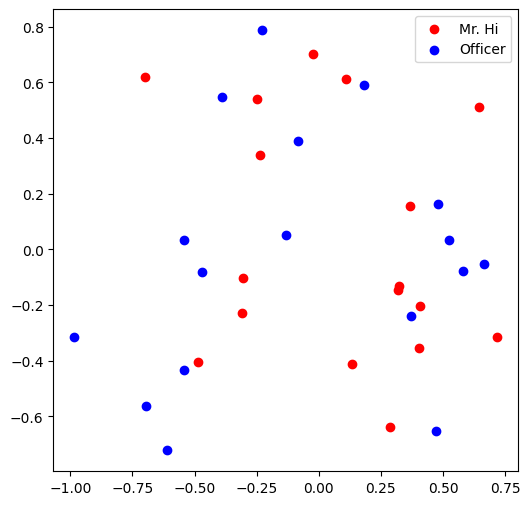

In [11]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [33]:
from torch.optim import SGD
import torch.nn as nn

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the
  # pred tensor (the resulting tensor after sigmoid) and the label
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places.
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############

  pred_labels = (pred > 0.5).long()  # convert boolean to 0 or 1
  correct = (pred_labels == label).sum().item()
  total = label.size(0)
  acc = correct / total
  accu = round(acc, 4)

  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and
  # learning rate. In general, you need to implement:
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch
  # (6) Update the embeddings using the loss and optimizer
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  for epoch in range(epochs):

    ############# Your code here ############
    
    optimizer.zero_grad()

    # (1) Get embeddings of nodes in train_edge
    embeddings = emb(train_edge)

    # (2) Compute dot product between embeddings of each node pair
    dot_product = torch.mul(embeddings[0], embeddings[1])
    dot_product = torch.sum(dot_product, dim=1)

    # (3) Apply sigmoid to the dot product to get predictions
    pred = sigmoid(dot_product)

    # (4) Calculate the loss
    loss = loss_fn(pred, train_label)

    # (5) Calculate accuracy
    acc = accuracy(pred, train_label)

    # Print loss and accuracy for monitoring
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}, Accuracy: {acc}")

    # (6) Backpropagation and optimization step
    loss.backward()
    optimizer.step()

    #########################################

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

print(pos_edge_index.shape)

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)
print(train_edge.shape)

train(emb, loss_fn, sigmoid, train_label, train_edge)

torch.Size([2, 78])
torch.Size([2, 156])
Epoch [10/500], Loss: 1.5796, Accuracy: 0.5
Epoch [20/500], Loss: 0.9542, Accuracy: 0.5128
Epoch [30/500], Loss: 0.6400, Accuracy: 0.5962
Epoch [40/500], Loss: 0.5156, Accuracy: 0.7244
Epoch [50/500], Loss: 0.4532, Accuracy: 0.8141
Epoch [60/500], Loss: 0.4079, Accuracy: 0.8718
Epoch [70/500], Loss: 0.3681, Accuracy: 0.891
Epoch [80/500], Loss: 0.3311, Accuracy: 0.9487
Epoch [90/500], Loss: 0.2965, Accuracy: 0.9551
Epoch [100/500], Loss: 0.2647, Accuracy: 0.9615
Epoch [110/500], Loss: 0.2359, Accuracy: 0.9744
Epoch [120/500], Loss: 0.2102, Accuracy: 0.9872
Epoch [130/500], Loss: 0.1874, Accuracy: 0.9872
Epoch [140/500], Loss: 0.1674, Accuracy: 0.9872
Epoch [150/500], Loss: 0.1499, Accuracy: 1.0
Epoch [160/500], Loss: 0.1346, Accuracy: 1.0
Epoch [170/500], Loss: 0.1212, Accuracy: 1.0
Epoch [180/500], Loss: 0.1095, Accuracy: 1.0
Epoch [190/500], Loss: 0.0993, Accuracy: 1.0
Epoch [200/500], Loss: 0.0903, Accuracy: 1.0
Epoch [210/500], Loss: 0.0824,

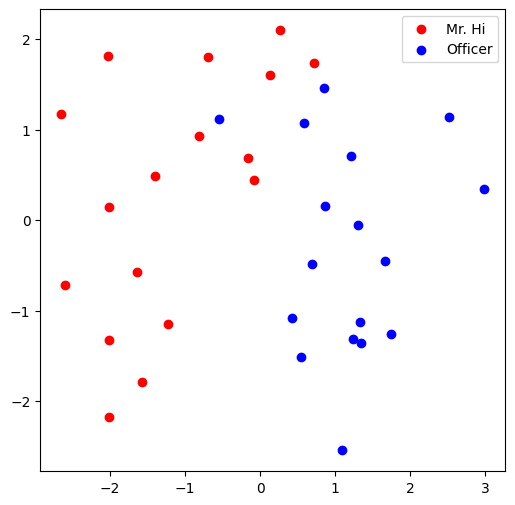

In [31]:
visualize_emb(emb)